In [2]:
import nltk
import pandas as pd
import re
import urllib
import requests
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import wordcloud

import os
txt_path = "../ZeldaTexts/"

In [3]:
df = pd.read_csv("Characters.csv")

In [4]:
baseurl = "https://zelda.fandom.com/api.php?"
content = "action=query&titles={name}&prop=extracts&exlimit=1&explaintext&format=json&indexpageids=true"

def download_txt(row):
    name = row.Name.replace(" ", "_")
    quoted_name = urllib.parse.quote_plus(name)
    url = baseurl + content.format(name=quoted_name)

    data = requests.get(url).json()
    extract = list(data["query"]["pages"].values())[0]["extract"]
    
    with open(f"ZeldaDescriptions/{row.Name}.txt", "w") as f:
        f.write(str(extract.encode(encoding="utf-8", errors="xmlcharrefreplace")))

download = False
if download: df.apply(download_txt, axis=1)

# Week 6 NLPP CHAPTER 1

In [5]:
corpus_root = "ZeldaDescriptions/"
file_names = [name + ".txt" for name in df.Name]
wordlists = nltk.corpus.PlaintextCorpusReader(corpus_root, file_names)

In [6]:
botw = nltk.Text(wordlists.words())

# This might be an excercise later

In [7]:
# Shows context word is used in
botw.concordance("link")

Displaying 25 of 4421 matches:
se - tinted glasses ". He also tells Link that he only talks about Horses . Wh
 .\ nOccasionally , Baddek will give Link tips for handling Horses , saying to
od behavior . In addition , he tells Link that he can \' t expect a horse to r
 need to . After this , he \' ll ask Link to name another animal that swims , 
here aren \' t any . He also informs Link that Stables fit registered Horses w
isingly comfortable .\ nBaddek tells Link that there are four different Stable
d these are simply the Stables where Link can have a worker change the gear of
 ". During this time , he \' ll give Link a quiz on Horses . He lists four dif
bone Horse \ xe2 \ x80 \ x94and asks Link which one doesn \' t exist . He says
ealed someday , somewhere , and that Link may already know it . Occasionally ,
nji speaks about Ludfo \' s Bog . If Link has not yet completed the trials on 
 a sign from Hylia to stay away . If Link has completed the trials , she will 
 be the doing of Hyli

In [8]:
# Shows similarely used words
botw.similar("link")

him he she it her zelda them they time this hyrule ganon mipha herself
impa there monsters attack ganondorf and


In [9]:
# common_context
botw.common_contexts(["link", "zelda"])

tells_that that_is asks_if of_s in_s to_that for_to that_has to_s
when_asks on_s n_s after_has for_s from_s with_s and_s tells_not
towards_and give_the


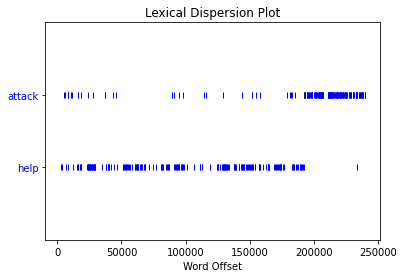

In [10]:
botw.dispersion_plot(["attack", "help"])

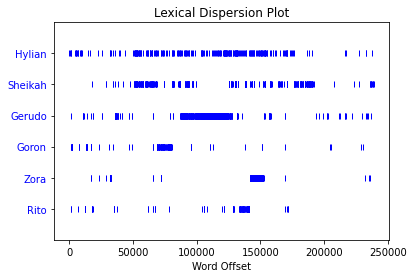

In [11]:
top_roles = list(df[df.Role=="Ally"]\
                    .Race.value_counts()[:6]\
                    .reset_index()["index"].values)
botw.dispersion_plot(top_roles)

# What is bigrams
Bigrams are word pairs, that is words appearing sequentually throughout the texts. Collocations are word pairs that appear unusually often. Example from book is Red Wine, that appears very often in this specific format, whereas pairs such as "The wine" does not, as the appears a lot without wine, and in lesser degree vice versa.

In [12]:
botw.collocations()

Nomenclature ==\; Biography ==\; See Also; References =='; Also ==\;
Divine Beast; References =="; Gerudo Town; Beast Vah; Ancient Shrine;
Calamity Ganon; Side Quest; Link speaks; Princess Zelda; Gallery ==\;
Sheikah Slate; Hyrule Castle; Zelda series; Wind Waker; years prior


In [13]:
b_words = [x for x in botw.tokens if x[0] == "b" or x[0] == "B"]
b_words[:5]

['b', 'Baddek', 'Breath', 'Biography', 'Bridge']

In [14]:
i = botw.index("Cherry")

cherry_sequence = botw[i-14:i+18]
print(" ".join(cherry_sequence))

However , she has a grudge against it as the Ancient Oven was named Cherry by Robbie after his first love , which causes Jerrin to become enraged and throw things .


In [15]:
# Technically they only tell us to do a for loop and conditonal at some point
# not for the whole exercise. It seems easier to read,
# if the list is sorted beforehand, and its also shorter in code.

# Also the resulting words were the same, so we created a set of words,
# so we see some different results

count = 0
sorted_words = sorted(set(botw), reverse=True, key=lambda x: len(x))

for word in sorted_words:
    if word[0].isupper():
        print(word)
        count += 1

    if count == 5: break

Characteristics
Transformations
Disambiguation
Sledgehammers
Manifestation


# Basic stats

In [16]:
print("Number of tokens: \t\t", len(botw.tokens))
print("Number of distinct tokens: \t", len(set(botw.tokens)))

Number of tokens: 		 239903
Number of distinct tokens: 	 11765


## Lexical Diversity
Extract from [textinspector](https://textinspector.com/help/lexical-diversity/):

"*As the name suggests, ‘lexical diversity’ is a measurement of how many different lexical words there are in a text.*

The lexical diversity tells us how difficult a text is to read, measured by how many different words are used in the text. If the frequency of words is low, the text is proberbly harder to read, as there are more words to get accostumed to. 

In [17]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total

In [18]:
lexical_diversity(botw)

0.04904065393096377

In [19]:
ally_files = [name + ".txt" for name in df[df.Role == "Ally"].Name]
enemy_files = [name + ".txt" for name in df[df.Role.isin(["Enemy", "Boss"])].Name]

allies = nltk.Text(
    nltk.corpus.PlaintextCorpusReader(corpus_root, ally_files).words()
)
enemies = nltk.Text(
    nltk.corpus.PlaintextCorpusReader(corpus_root, enemy_files).words()
)

In [20]:
print("Ally lexical diversity: \t",  lexical_diversity(allies))
print("Enemy lexical diversity: \t", lexical_diversity(enemies))

Ally lexical diversity: 	 0.05317582160235227
Enemy lexical diversity: 	 0.089616319008126


In [21]:
freq = nltk.FreqDist(botw)

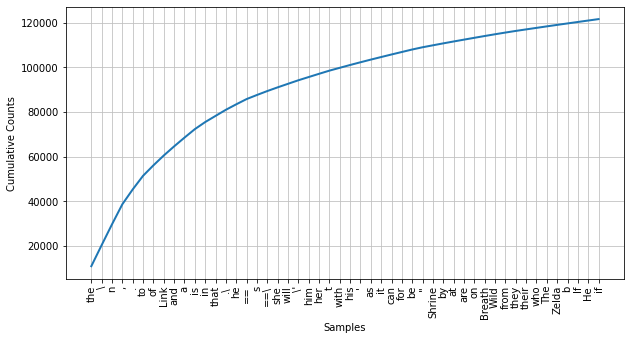

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [22]:
# Cummulative plot
plt.figure(figsize=(10, 5))
freq.plot(50, cumulative=True)

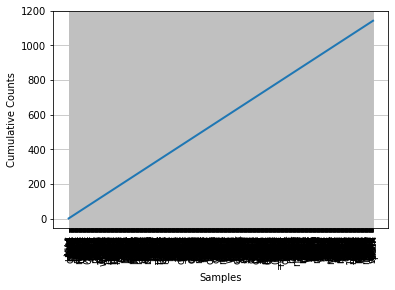

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [23]:
four_letter = [x.lower() for x in botw.tokens if len(x) == 4]

fourdist = nltk.FreqDist(set(four_letter))
fourdist.plot(cumulative=True)

In [24]:
print(f"Average len of tokens: {sum(len(w) for w in botw)/len(botw):.2f}")

Average len of tokens: 3.83


In [25]:
def vocab_size(text):
    return len(set(text))

def percent(word, text):
    return text.count(word)/len(text) * 100

print(f"Word 'Link' occurence in text:  {percent('Link', botw):.2f}%")

Word 'Link' occurence in text:  1.84%


# Week 7

## Preprocessing the files
Following guidelines.

In [26]:
raw_path = "ZeldaDescriptions/"
processed_path = "PreprocessedDescriptions/"
names = df.Name.values

tokenizer = nltk.tokenize.WordPunctTokenizer()
wnl = nltk.WordNetLemmatizer()

def preprocess_zelda_descriptions(row):
    filename = row.Name + ".txt"
    txt = open(raw_path + filename, "r").read()[2:-1]
    txt.encode('latin1').decode("utf-8")

    txt = re.sub("=+.*?=+", " ", txt) # Removes header
    txt = re.sub(r"\\n|\.|,|\\", " ", txt)

    token = tokenizer.tokenize(txt)
    all_words = [x.strip().lower() for x in token]

    stop_words = nltk.corpus.stopwords.words("english")
    stop_words += [".", ",", "'", "\""]
    stop_words += [x.lower() for x in names]

    filtered = [w for w in all_words if w not in stop_words]

    lemmatized = [wnl.lemmatize(w) for w in filtered]

    with open(processed_path + filename, "w") as f:
        f.write(" ".join(lemmatized))

process = False
if process: df.apply(preprocess_zelda_descriptions, axis=1)

# Joining all together in new corpus

In [27]:
pwlst = nltk.corpus.PlaintextCorpusReader(processed_path, file_names)

In [28]:
pbotw = nltk.Text(pwlst.words())

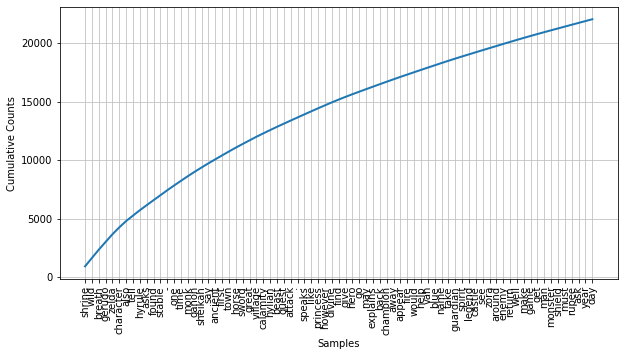

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [29]:
freq = nltk.FreqDist(pbotw)
plt.figure(figsize=(10, 5))
freq.plot(75, cumulative=True)

# Explanation fo TF-IDF

## TF - Term frequency
TF is the frequency of a term, calculated by llooking at how many times the term occurs in the document

## IDF - Inverse Document Frequency
IDF is a measure of how much info9rmation teh word provideds, whether its  common or rare accross the documents.

In [30]:
races = {}

def TF(term, text: nltk.Text) -> float:
    return text.count(term) / len(text)

def IDF(terms, wlist: nltk.corpus.PlaintextCorpusReader) -> pd.DataFrame:
    counts = [[term, 0] for term in terms]

    for file_id in wlist.fileids():
        txt = wlist.raw(file_id).split(" ")
        for row in counts:
            if row[0] in txt: row[1] += 1

    i_df = pd.DataFrame(counts, columns=["Term", "IDF"])
    i_df["IDF"] = np.log2(len(wlist.fileids())/i_df["IDF"])

    return i_df

for race in tqdm(df.Race.unique().tolist()):
    filenames = [name + ".txt" for name in df[df.Race==race].Name]
    wlist = nltk.corpus.PlaintextCorpusReader(processed_path, filenames)

    terms = set(wlist.words())

    text = nltk.Text(wlist.words())
    tfs = [[term, TF(term, text)] for term in terms]
    tdf = pd.DataFrame(tfs, columns=["Term", "TF"])

    idf = IDF(terms, wlist)
    
    races[race] = {}
    races[race]["pd"] = pd.merge(tdf, idf, on="Term")
    races[race]["wlist"] = wlist

100%|██████████| 27/27 [00:03<00:00,  7.06it/s]


In [31]:
print("Highest values of TF")
for race, d in races.items():
    print("{:13}:".format(race), ", ".join(d["pd"].sort_values(by=["TF"]).head(5)["Term"].to_list()))

Highest values of TF
Hylian       : birth, yard, luminous, began, specializing
Horse        : meaning, shuts, tame, early, galloping
Goron        : warrior, pursuing, eventually, waking, whereabouts
Human        : claiming, special, milestone, profit, train
Dragon       : rubber, note, game, helmet, golden
Rito         : glued, pain, discover, mouth, pretty
Unknown      : eight, activate, landing, queen, grab
Korok        : information, two, happen, mouth, riddle
Zora         : supposes, purchase, taught, smites, neglected
Sheikah      : eight, lovely, 50, harbinger, rumored
Gerudo       : |]], flavor, academia, discus, dedication
Great Fairy  : agrees, expressing, introduces, view, necluda
Ancient Orb  : beach, completing, open, front, wild
Sand Seal    : share, hair, [, disabling, wildberries
Dog          : two, leaving, treasure, react, sake
Bokoblin     : |]], wave, mogma, earth, reaction
Lizalfos     : mortal, get, called, agile, toward
Moblin       : unable, immense, blin, around

In [32]:
print("Highest values of IDF")
for race, d in races.items():
    print("{:13}:".format(race), ", ".join(d["pd"].sort_values(by=["IDF"]).head(5)["Term"].to_list()))

Highest values of IDF
Hylian       : wild, character, breath, found, hylian
Horse        : breath, wild, character, stable, horse
Goron        : character, breath, wild, goron, city
Human        : claiming, mistakenly, material, title, yell
Dragon       : roaming, great, dragon, horn, breath
Rito         : wild, breath, character, rito, village
Unknown      : ancient, :, eponymous, shrine, may
Korok        : character, wild, breath, korok, forest
Zora         : breath, character, zora, wild, domain
Sheikah      : shrine, ancient, monk, breath, wild
Gerudo       : wild, breath, character, gerudo, town
Great Fairy  : character, first, fountain, great, fairy
Ancient Orb  : beach, completing, open, front, wild
Sand Seal    : share, [, gerudo, divine, disabling
Dog          : two, react, sake, since, chest
Bokoblin     : bokoblins, enemy, drop, weapon, series
Lizalfos     : electric, ice, fire, -, breath
Moblin       : weapon, moblins, enemy, defeated, silver
Wizzrobe     : wizzrobe, wizzro

100%|██████████| 27/27 [00:37<00:00,  1.38s/it]
C:\Users\s174169\AppData\Local\Temp/ipykernel_16252/1381065181.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


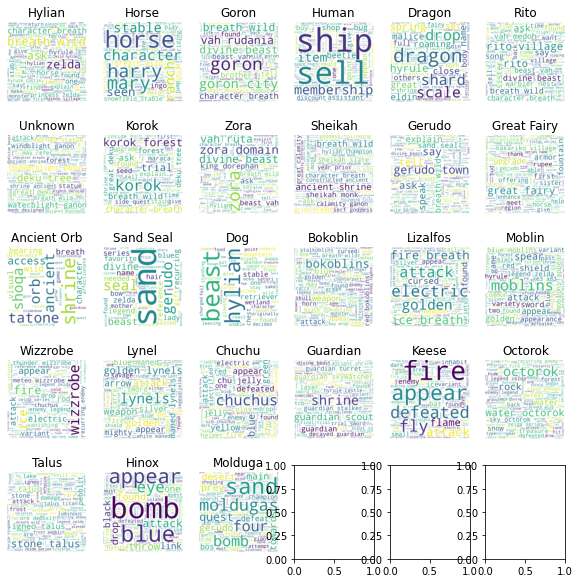

In [40]:
def generate_wordclouds(races: dict):
    l = len(races)

    per_col = 6
    rows = 1 + l//per_col # This gives the necessary number of columns
    cloud_size = 20

    kwargs = dict(
        figsize=(rows*cloud_size, per_col*cloud_size)
    )

    wcloud = wordcloud.WordCloud(
        background_color='white',
        width=1000,
        height=1000
    )

    fig, axs = plt.subplots(nrows=rows, ncols=per_col, figsize=(10, 10))
    for ax, (name, val) in tqdm(zip(axs.flatten(), races.items()), total=l):
        cloud = wcloud.generate(" ".join(val["wlist"].words()))
        ax.imshow(cloud)
        ax.set_title(name)
        ax.axis("off")
    fig.show()

generate_wordclouds(races)

# Week 8